In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

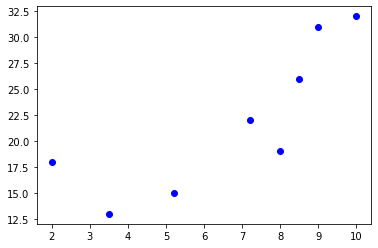

In [20]:
dataset = [
    [8.5, 26],
    [7.2, 22],
    [10, 32],
    [5.2, 15],
    [2, 18],
    [3.5, 13],
    [8, 19],
    [9, 31]]

X = np.array([[example[0]] for example in dataset])
Y = np.array([[example[1]] for example in dataset])
# Visualize the dataset
plt.scatter(X, Y, color="blue")
plt.show()


In [22]:
# Create linear regression model object
model = linear_model.LinearRegression()

# Train the linear regression model
model.fit(X,Y)
Y_prime = model.predict(X)

# The mean squared error loss
mean_square_error = np.mean((Y_prime - Y)**2)
print("Mean Square error : {}".format(mean_square_error))

# The coefficients
print("Linear Equation : {}*x + {} ".format(model.coef_[0][0], model.intercept_[0]))

Mean Square error : 14.394185214981674
Linear Equation : 2.0577455975686063*x + 8.264548136229553 


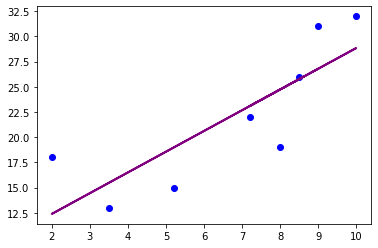

In [23]:
plt.scatter(X, Y, color="blue")
plt.plot(X, Y_prime, color="purple", linewidth=2)
plt.show()